<a href="https://colab.research.google.com/github/rrl7012005/Scikit-Learn-ClassicalML-Course/blob/main/ML_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import os

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Best is to work with real datasets.Kaggle is a great source for real-world data.

#Problem 1

In [ ]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

100%|██████████| 6.99M/6.99M [00:00<00:00, 40.8MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [ ]:
os.listdir('rossmann-store-sales')


['train.csv', 'sample_submission.csv', 'store.csv', 'test.csv']

In [ ]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv', low_memory=False)
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


There are 1 million rows of data and 1000 stores so we have approximately 1000 days of data.

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams!


Submissions are evaluated on the Root Mean Square Percentage Error (RMSPE). The RMSPE is calculated as

RMSPE=1n∑i=1n(yi−y^iyi)2−−−−−−−−−−−−−−−⎷,
where y_i denotes the sales of a single store on a single day and yhat_i denotes the corresponding prediction. Any day and store with 0 sales is ignored in scoring.

##Data Cleaning

We want to include the store data in the training set as we believe that important

In [ ]:
merged_df = ross_df.merge(store_df, how='left', on='Store') #use merge method on the left of store frame on column called store
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Read the testing set as well

In [ ]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [ ]:
#Look at data information

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
merged_df.describe() #describes it or you can transpose (switch rows and columns)
merged_df.describe().T #you can also round each place
round(merged_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


A good data scientists questions why there were 0 sales on certain days to determine whether they were outliers and should be excluded from model predictions. Fix the dates.

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

##Data Visualization

Study the target column 'Sales'

<Axes: xlabel='Sales', ylabel='Count'>

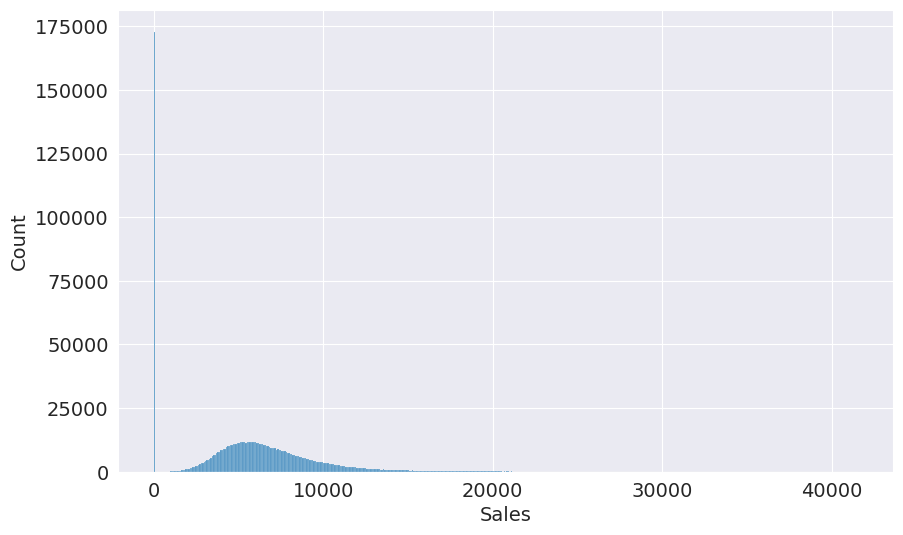

In [ ]:
sns.histplot(data=merged_df, x='Sales')

Seems to be chi squared distributed but there is a huge spike with 0 sales on so many dates. Why? Lets check if its because the store was closed. If we just leave it like that it would be very difficult for linear models to handle

In [ ]:
merged_df.Open.value_counts(), merged_df.Sales.value_counts()[0]

(Open
 1    844392
 0    172817
 Name: count, dtype: int64,
 172871)

Seems to correlate so lets remove all rows of data when the store was closed rather than trying to make our model so complex as to predict when the store was closed.

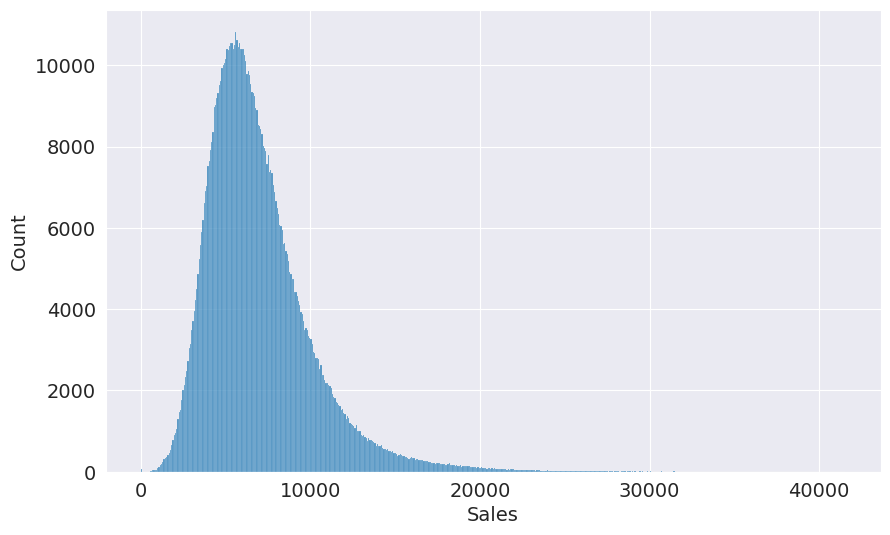

In [ ]:
merged_df = merged_df[merged_df.Open==1].copy()
sns.histplot(data=merged_df, x='Sales'); #Much more manageable now.

Now lets explore sales vs customers for each year

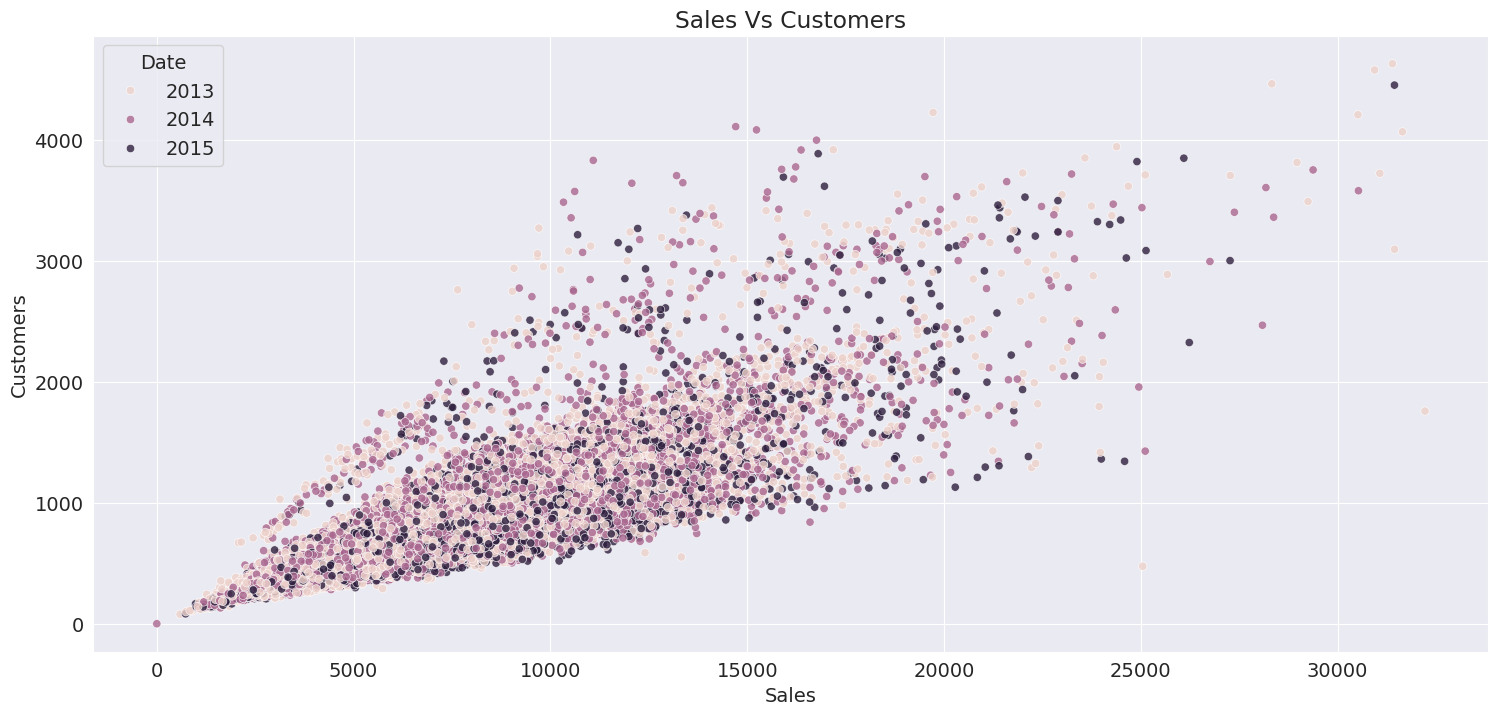

In [ ]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000) #Extract only 40000 datasets
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()


Customers isnt really a good input column though as we may not know ahead of time how many customers may come to the store.

Now do stores vs sales.

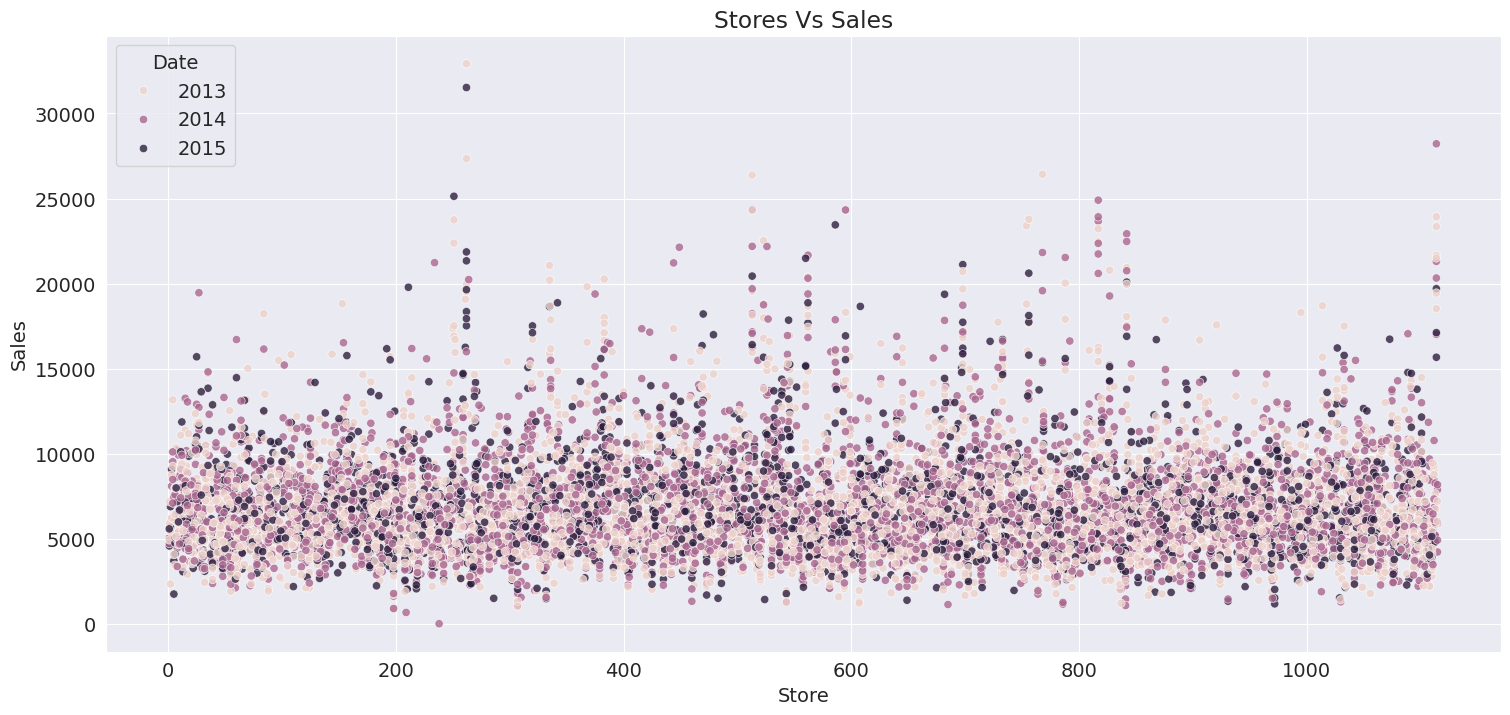

In [ ]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

Most stores have a similar number of sales but some really stand out.

Now look at sales at different days of the week

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

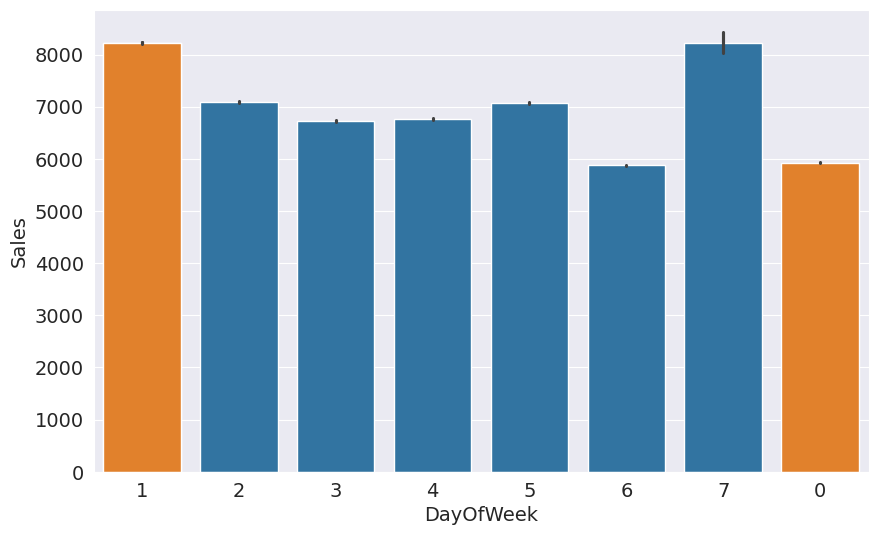

In [ ]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')
sns.barplot(data=merged_df, x='Promo', y='Sales')

Promotion seems to be an important factor. lets compute correlations of sales with other features with sales. The data is only valid for numerical data, stores are numeric but not continuous so it does not reveal much.

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64     

In [ ]:
numeric_df = merged_df.select_dtypes(include=np.number)
numeric_df.corr()['Sales'].sort_values(ascending=False)

,Sales
Sales,1.000000
Customers,0.823597
Promo,0.368145
Promo2SinceWeek,0.095311
SchoolHoliday,0.038617
CompetitionOpenSinceYear,0.016101
Store,0.007710
Promo2SinceYear,-0.034713
CompetitionDistance,-0.036396
CompetitionOpenSinceMonth,-0.043489


Open is constant and it makes no sense for a constant column to have any correlation a there is no variance.

Now we hypothesize the month and day of the week is important in the specific day, so we do feature engineering to extract the necessary features.

<Axes: xlabel='Year', ylabel='Sales'>

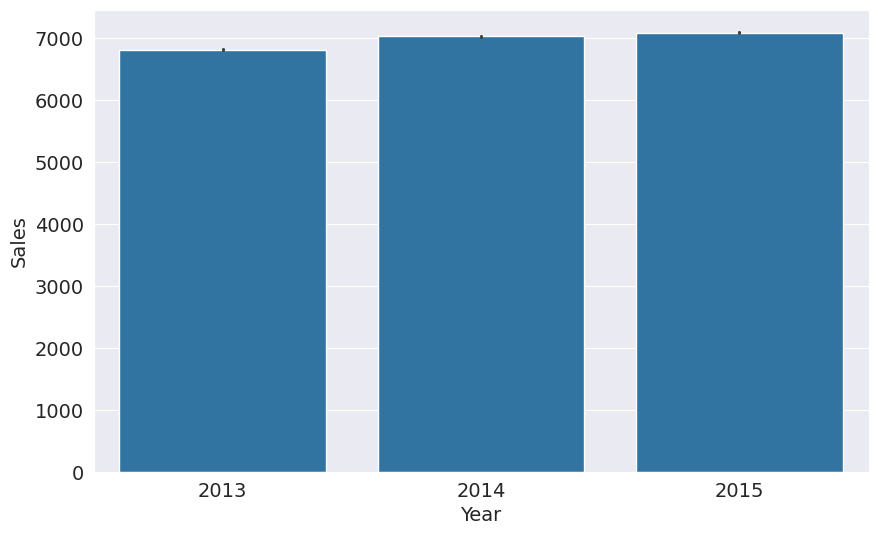

In [ ]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

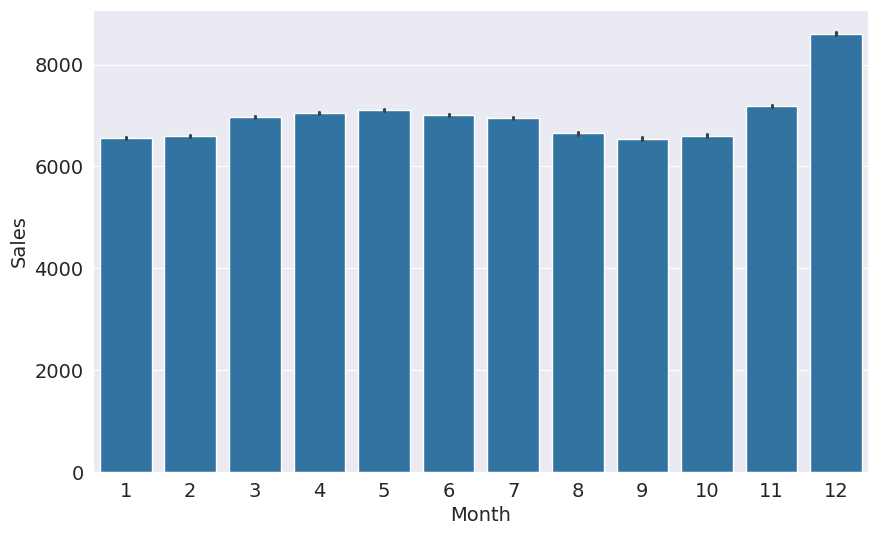

In [ ]:
sns.barplot(data=merged_df, x='Month', y='Sales')

<Axes: xlabel='Day', ylabel='Sales'>

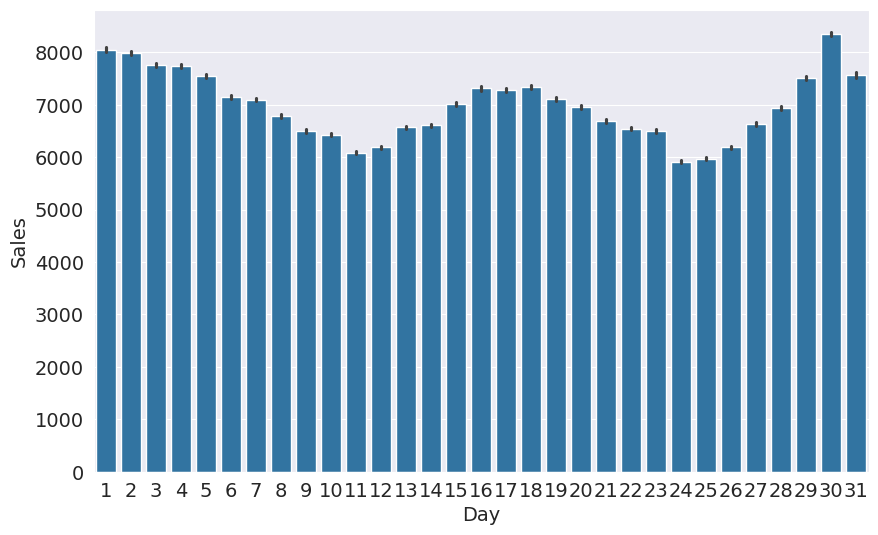

In [ ]:
sns.barplot(data=merged_df, x='Day', y='Sales')

Hypothesis seems correct. Could do it as day of the week. The more features we extract, the better, but we have to ensure dependencies are good for a linear model. We could use other information, weather on each data, public holiday, promotion on the day etc.

##Data Preprocessing

In [ ]:

train_size = int(0.75 * len(merged_df)) #its already sorted by date

sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

len(train_df), len(val_df), train_df

(633294,
 211098,
          Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
 1017190   1097          2 2013-01-01   5961       1405     1      0   
 1016179     85          2 2013-01-01   4220        619     1      0   
 1016353    259          2 2013-01-01   6851       1444     1      0   
 1016356    262          2 2013-01-01  17267       2875     1      0   
 1016368    274          2 2013-01-01   3102        729     1      0   
 ...        ...        ...        ...    ...        ...   ...    ...   
 256632     745          3 2014-12-10   6897        657     1      0   
 256642     756          3 2014-12-10  15736       2292     1      0   
 256634     747          3 2014-12-10   7444        608     1      0   
 256633     746          3 2014-12-10   5207        474     1      0   
 256636     749          3 2014-12-10   3587        539     1      0   
 
         StateHoliday  SchoolHoliday StoreType  ... CompetitionDistance  \
 1017190            a              1     

In [ ]:
train_df.Date.min(), train_df.Date.max(), val_df.Date.min(), val_df.Date.max(), merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2013-01-01 00:00:00'),
 Timestamp('2014-12-10 00:00:00'),
 Timestamp('2014-12-10 00:00:00'),
 Timestamp('2015-07-31 00:00:00'),
 Timestamp('2015-08-01 00:00:00'),
 Timestamp('2015-09-17 00:00:00'))

In [ ]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

For the initial model, just pick a few models for fast training and optimization.

In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_col = 'Sales'
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


Technically stores should be treated as a categorical column, but if we introduce 1000 extra features there will be an insane dataset. So we leave it as a numeric data. Perhaps we could compute the average sales value of each store and reassign the numerical values so a higher value means higher stores.

Do same way for month and days. Decision trees should be able to sort these problems better than linear model.s

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = merged_test_df[input_cols].copy()

#Test data has no targets

numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

**Imputation, Scaling and Encoding**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

##Training and performance measuring

First create a dumb model that reutnrs the mean value of sales as the prediction.

In [ ]:
from sklearn.metrics import mean_squared_error

def return_mean(inputs):
  return np.full(len(inputs), merged_df.Sales.mean()) #creates array to fill with specified shape

train_preds = return_mean(X_train)
val_preds = return_mean(X_val)

mean_squared_error(train_preds, train_targets, squared=False), mean_squared_error(val_preds, val_targets, squared=False)

(3082.450443277419, 3168.6033635047716)

Model is off by about $3000 on average out of a range of 14000. So this dumb model is off by about 20%. Our model should be much better than this.

Lets try another dumb model

In [ ]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

print(mean_squared_error(guess_random(X_train), train_targets, squared=False))
print(mean_squared_error(guess_random(X_val), val_targets, squared=False))

18634.455038596152
18374.87025564853


Clearly this is much worse.

You can try several more logic based, hand coded strategies and machine learning should still be better than this otherwise no point.

Now lets train a linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, train_targets)

train_preds = linreg.predict(X_train)
val_preds = linreg.predict(X_val)

print(mean_squared_error(train_preds, train_targets, squared=False))
print(mean_squared_error(val_preds, val_targets, squared=False))

2741.5860353706703
2817.656190781348


This isnt much better than just predicting the mean, we need to significantly improve. We can use this as our baseline.

Create a try model function

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor


def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)

    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    print(train_rmse, val_rmse)

In [ ]:
try_model(LinearRegression())
try_model(Ridge()) #L2
try_model(Lasso()) #L1
try_model(ElasticNet()) #L1 and L2
try_model(SGDRegressor()) #Linear regression but using SGD (used for large datasets, or dynamically update model with new data)

2741.5860353706703 2817.656190781348
2741.5871950814444 2817.7784665409868
2741.7143904640566 2817.9472924045217
2879.0432103903954 2972.6658860503385
2741.9925846218625 2819.224166040185


Should probably create a spreadsheet for all this or a pandas frame. But anyways if our model is not overfitting then using regularization is useless.

Lets try tree based methods

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

0.0 1559.7378600480247


No error from the regressor lol, it just memorized the set. But the validation loss is still much lower.

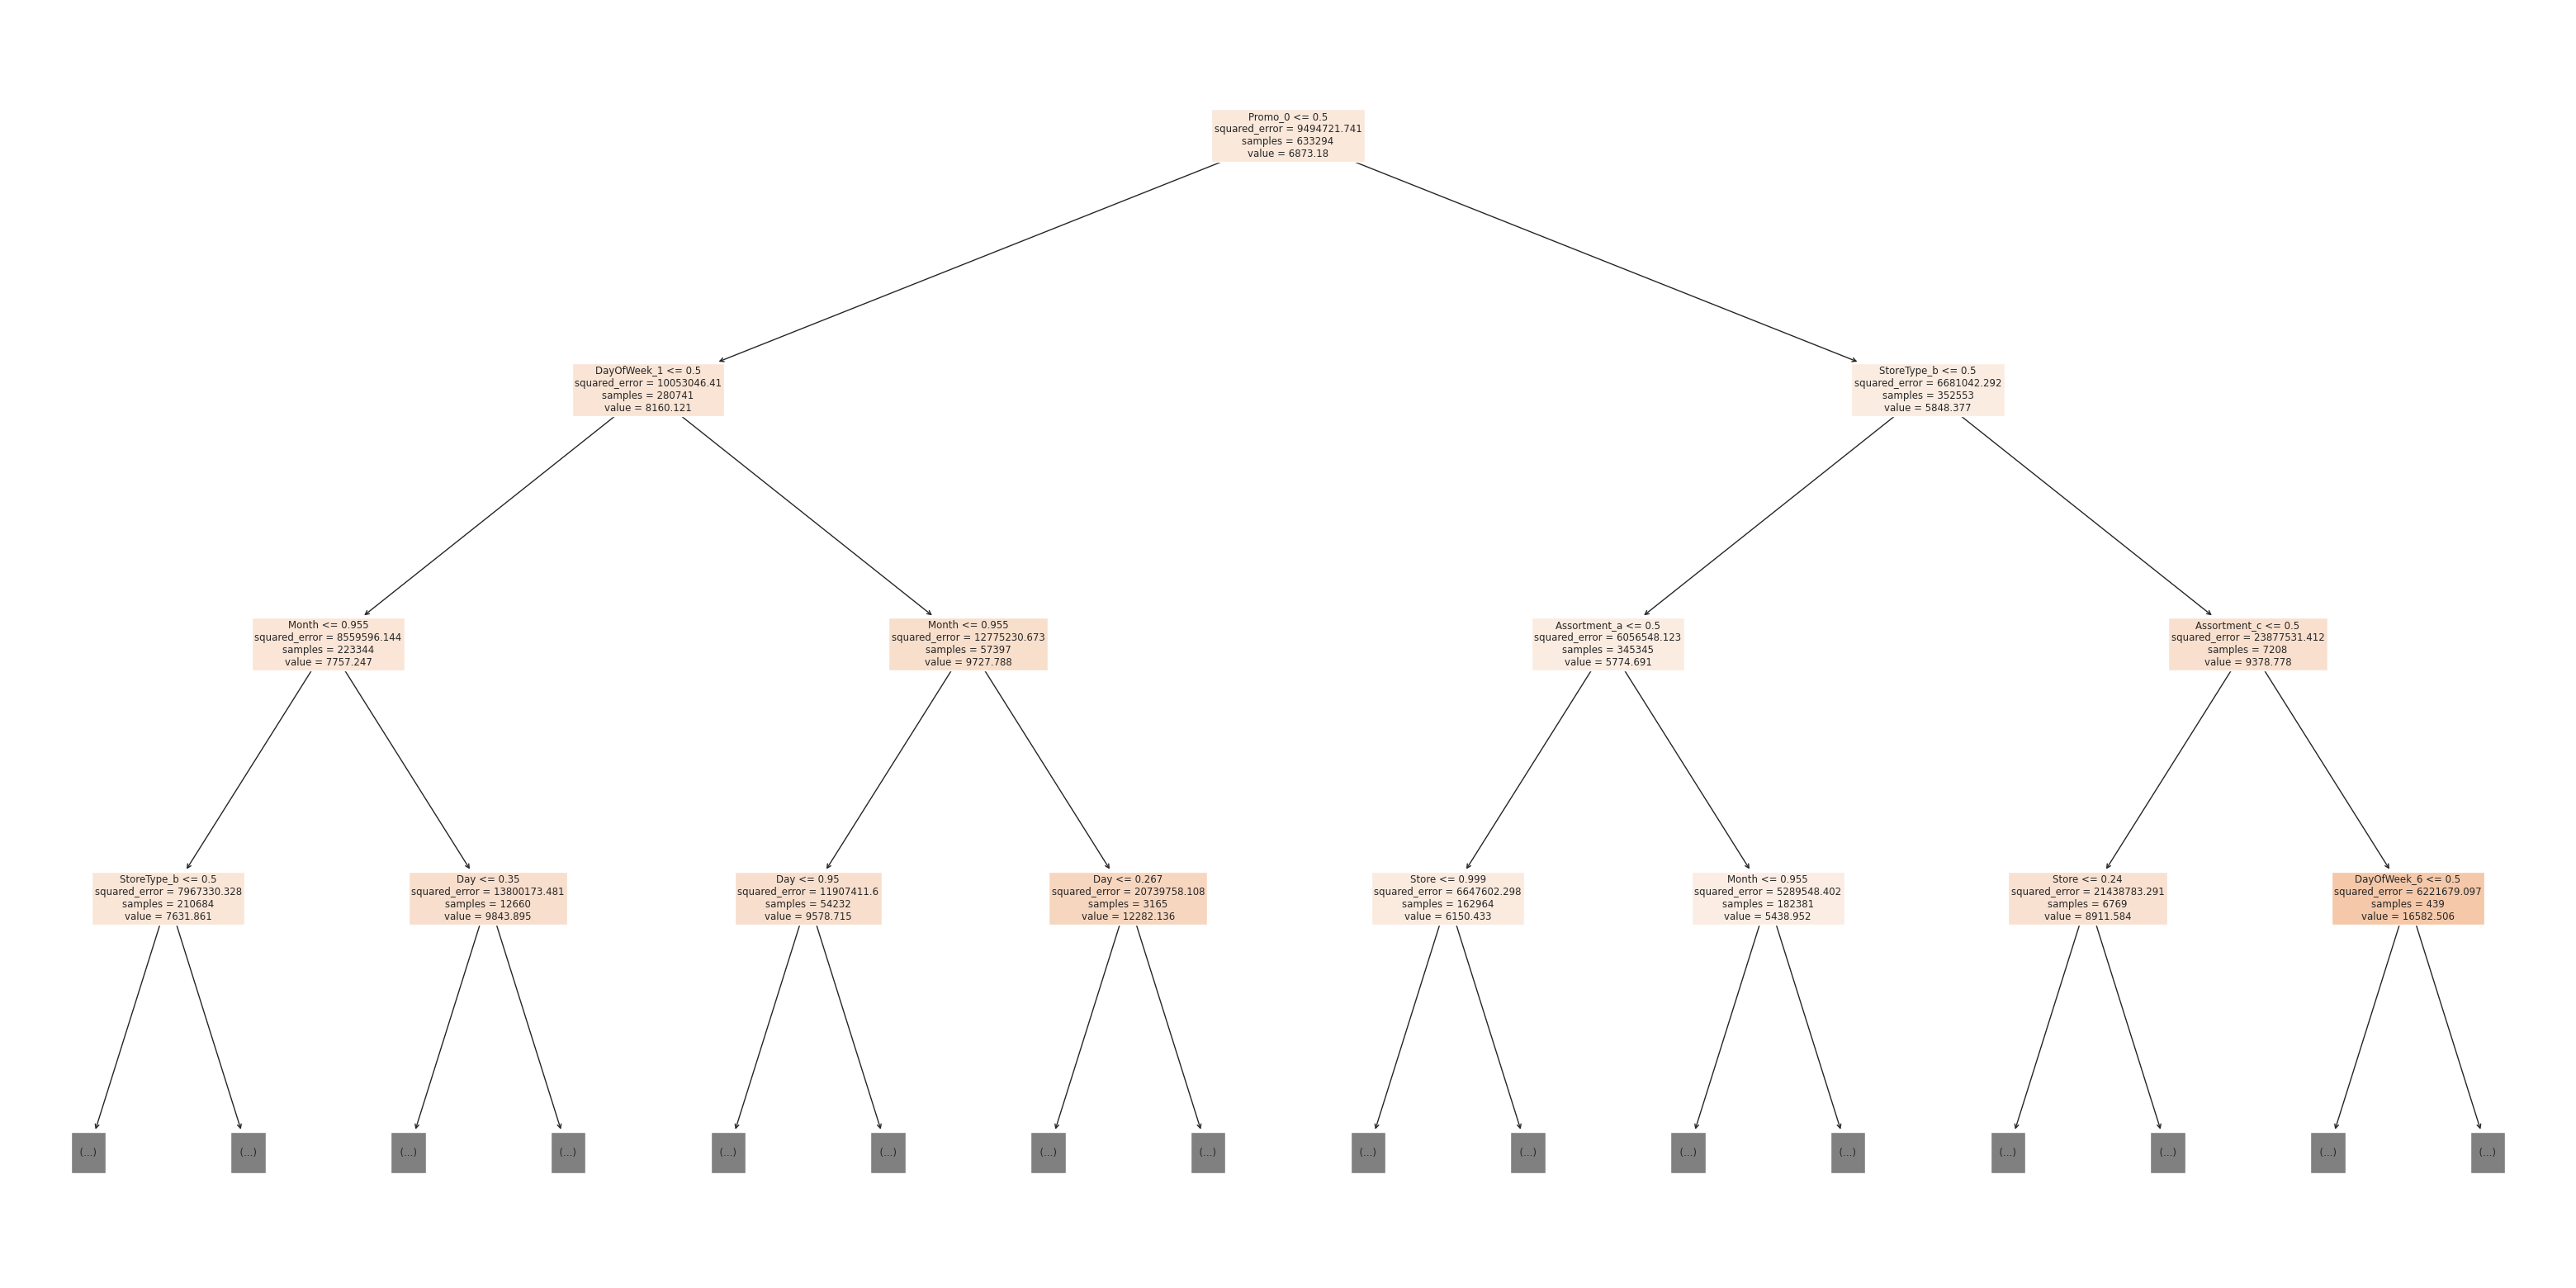

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

Now try the forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

474.9198974666898 1371.7321923469985


Best we have done so far. Now lets do hyperarameter tuning.

##Hyperparameter Tuning

You can use a grid search

See below.

**K-fold cross validation**

Split the training set into several different subsets (called k-folds). Then you can dedicate one of the subsets as the validation set, train a model on the other 4 subsets. And then change the validation set, repeat for a different model etc. This is a quick way to test hyperparameters rather than looking at the whole model.

See below.

After look at multiple models, look at specific examples one by on to see what is going wrong.

You can also ensemble different models for example a random forest and a ridge regressor, and give a weightage to each model. Perhaps learnable weights? Thats called stacking.

See below.

##Presentation

Indicate the most important features

In [ ]:
print(rf.feature_importances_)
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

[6.07412101e-01 4.88393196e-02 4.71254150e-02 9.30282826e-03
 3.36941035e-02 4.40591456e-03 2.43735761e-03 2.11467096e-03
 5.71418981e-03 6.96554452e-03 4.47739863e-03 5.83469269e-02
 8.05201285e-02 1.18767484e-03 2.11472202e-04 2.45172539e-05
 1.88388455e-05 1.38995265e-02 2.25678813e-02 1.04169805e-02
 1.39945667e-02 8.34303630e-03 5.50125164e-03 1.24783549e-02]


,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


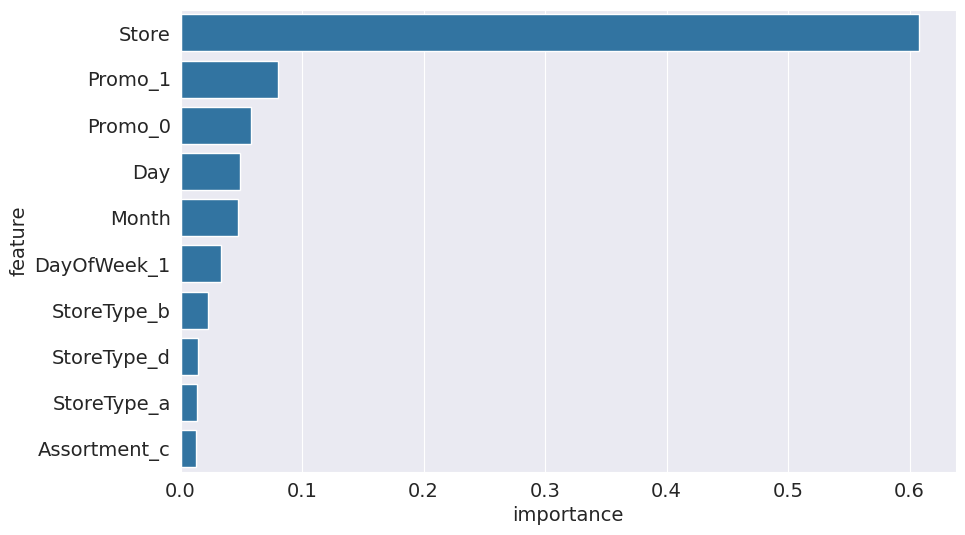

In [ ]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Individual Predictions**

In [ ]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0.
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [ ]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

predict_input(rf, sample_input)

4258.01

**Kaggle submission**

test_preds = rf.predict(X_test)
test_preds

In [ ]:
test_preds = rf.predict(X_test)
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')
submission_df['Sales'] = test_preds * test_df['Open'].astype('float')
submission_df.fillna(0, inplace=True)
submission_df.to_csv('submission.csv', index=None)
!head submission.csv

Id,Sales
1,4258.01
2,7713.83
3,8775.7
4,6775.37
5,6492.47
6,5750.74
7,8081.26
8,8166.45
9,5893.82


In [ ]:
from IPython.display import FileLink

FileLink('submission.csv')

/content/submission.csv

Now submit this file on the page

You can now make a submission on this page: https://www.kaggle.com/c/rossmann-store-sales/submit

#Problem 2

In this playground competition, hosted in partnership with Google Cloud and Coursera, you are tasked with predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While you can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used (see the starter code for an example of this approach in Kernels). Your challenge is to do better than this using Machine Learning techniques!

The evaluation metric for this competition is the root mean-squared error or RMSE. RMSE measures the difference between the predictions of a model, and the corresponding ground truth. A large RMSE is equivalent to a large average error, so smaller values of RMSE are better. One nice property of RMSE is that the error is given in the units being measured, so you can tell very directly how incorrect the model might be on unseen data.


In [ ]:
!pip install opendatasets

import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import plotly.express as px

In [ ]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [00:24<00:00, 69.1MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [ ]:
data_dir = './new-york-city-taxi-fare-prediction'
!ls -lh {data_dir} #list of files with size in the directory, this is a shell command

total 5.4G
-rw-r--r-- 1 root root  486 Sep  7 15:57 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Sep  7 15:57 sample_submission.csv
-rw-r--r-- 1 root root 960K Sep  7 15:57 test.csv
-rw-r--r-- 1 root root 5.4G Sep  7 15:58 train.csv


In [ ]:
!pip install xgboost

In [ ]:
!head {data_dir}/train.csv #See head of training file

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [ ]:
!wc -l {data_dir}/train.csv #number of lines in the training set

55423856 ./new-york-city-taxi-fare-prediction/train.csv


We have to use GPU for this, too much data.

## Data Loading and Cleaning

Loading the entire dataset at once is crazy so lets work with a sample first.

Also ignore the key column as thats just an id, waste of memory.

In [ ]:
sample_frac = 0.01 #portion of set
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')

#We can load in 2 ways

dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

import random

def skip_row(row_idx):
    if row_idx == 0:
        return False #Keep the first row
    return random.random() > sample_frac #Skip row if this is true, randomly choose

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv",
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)

In [ ]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


## Data Exploration and Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


No nulls so far.

In [ ]:
df.describe()
#There are some weird anomalous data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255057,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [ ]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [ ]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [ ]:
test_df.describe()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [ ]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

To simplify the training set, drop the rows that fall outside the test range.

This data is not time series dependent, can use future data.

## Preprocessing and Cleaning

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(val_df)

(441960, 110490)

Drop nans instead of filling them since we have so much data

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target_col = 'fare_amount'

train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [ ]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977386,40.738335,-73.976143,40.751205,1
515867,-73.983910,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750019,3
19482,-73.986725,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980057,40.760334,-73.872589,40.774300,1


In [ ]:
test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


## Training

**Train a dumb and baseline model **

In [ ]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

mean_model = MeanRegressor()
mean_model.fit(train_inputs, train_targets)
mean_model.mean

11.354714

In [ ]:
train_preds = mean_model.predict(train_inputs)
val_preds = mean_model.predict(val_inputs)

from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

train_rmse, val_rmse

(9.789782, 9.899954)

**Baseline model**

In [ ]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(train_inputs, train_targets)

train_preds = linreg_model.predict(train_inputs)
val_preds = linreg_model.predict(val_inputs)

train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

train_rmse, val_rmse

(9.788632, 9.898088)

Baseline is as bad as the mean model. This is probably because the training data (geocoordinates) is not in a format thats useful for the model and we're not using pickup date and time columns

## Initial Predictions

In [ ]:
test_preds = linreg_model.predict(test_inputs)
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [ ]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

generate_submission(test_preds, 'linreg_submission.csv')

## Feature Engineering

Now lets create a bettery model by adding more features. Creative feature engineering is always ALOT BETTER THAN hyperparameter tuning.

We can extract parts of the date, include the distance between the pickup and drop (the latitude and longitude features itself are very difficult for model to pickup), and include the distance from major landmarks.

We also need to remove outliers and invalid data.

In [ ]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

add_dateparts(train_df, 'pickup_datetime')
add_dateparts(val_df, 'pickup_datetime')
add_dateparts(test_df, 'pickup_datetime')

train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18


In [ ]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

add_trip_distance(train_df)
add_trip_distance(val_df)
add_trip_distance(test_df)

train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101


Add distance from popular landmarks. JFK, LGA, EWR airports, times square, met museum, world trade center.

In [ ]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])
    return df

for a_df in [train_df, val_df, test_df]:
  for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
      add_landmark_dropoff_distance(a_df, name, lonlat)

train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411,20.241400,9.556355,17.564440,4.300385,4.261684
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000,20.397520,11.641132,15.713149,6.614004,1.900218
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504,20.894815,8.192266,19.044893,2.079418,6.402866
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912,22.322773,8.819165,18.902145,1.503061,7.168338
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267,21.658104,10.286617,16.863903,3.986955,4.489382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976,21.680714,8.973204,18.381714,2.244238,6.189971
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529,21.146925,14.006921,13.743814,8.996409,0.596505
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601,19.899387,11.589870,15.933608,6.913579,1.906144
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101,21.695084,10.233944,16.927792,3.889789,4.594002


**Removal of outliers and invalid data**

In [ ]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937862,1.684444,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751762,193.148026,182.365189,191.412308,177.416016,178.902115
std,9.789793,11.795325,8.464263,12.398610,9.857421,1.344170,1.857024,3.434881,8.697374,1.950033,6.517710,371.299316,1223.614746,1226.672119,1228.515259,1228.388794,1228.487183
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305583,0.116402,0.129245,0.031195,0.009281
25%,6.000000,-73.992027,40.734859,-73.991409,40.733967,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212447,20.535247,8.350981,16.502820,2.169769,3.642480
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116254,21.202131,9.575539,18.016346,3.817937,5.559632
75%,12.500000,-73.967186,40.767006,-73.963715,40.768044,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879624,21.948318,11.122054,19.953297,6.071617,7.814558
max,400.000000,2420.209473,404.899994,2467.752686,3351.403076,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.427734,15057.673828,15074.642578,15074.713867,15077.615234,15072.110352


In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433216,20.916754,9.675180,18.546659,4.512898,6.037652
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303943,3.295647,4.035820,4.018427,4.252539
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.401900,0.285629,0.284680,0.085747,0.040269
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297261,20.513337,8.311565,16.520517,2.126287,3.670107
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215648,21.181472,9.477797,18.024350,3.698123,5.541466
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.043051,21.909794,10.965272,19.880536,5.922544,7.757612
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933281,134.497726,126.062576,149.400787,130.347153,138.619492


We see outliers so lets keep the fare ranges between 1 and 500 (no negative values).

Longitudes from -75 to -72.
Latitudes from 40 to 42.
Passenger count from 1 to 6.

We will lose some data but we have so much anyways and the train data is not in those ranges so no need to worry.

In [ ]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

train_df = remove_outliers(train_df)
val_df = remove_outliers(val_df)
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000,431098.000000
mean,11.347895,-73.975121,40.750957,-73.974342,40.751324,1.690374,2011.737524,6.266821,15.732629,3.035066,13.506704,3.330515,20.913206,9.693021,18.474831,4.497471,5.967942
std,9.714552,0.039226,0.030028,0.038444,0.033221,1.306414,1.862116,3.436091,8.697833,1.950459,6.516894,3.741833,3.105583,3.091470,3.759176,3.804997,3.995043
min,1.000000,-74.839172,40.063896,-74.843079,40.054207,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305583,0.116402,0.129245,0.031195,0.009281
25%,6.000000,-73.992249,40.736530,-73.991592,40.735497,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.253382,20.519000,8.323345,16.477411,2.140186,3.585761
50%,8.500000,-73.982101,40.753319,-73.980606,40.753765,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.153255,21.173625,9.520789,17.958796,3.720862,5.488690
75%,12.500000,-73.968399,40.767437,-73.965401,40.768360,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.917217,21.898378,10.986174,19.785087,5.906888,7.641019
max,400.000000,-72.982796,41.787712,-72.935562,41.806301,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,113.474625,130.364136,114.624855,125.375267,114.114685,121.605186


**Scaling and One-Hot Encoding**

Now for tree based models this is not really necessary because they can distinguish this well. However if you are using linear or continuous values/models then use scaling and one hot encoding.

Now we can save the current state of the datasets so we do not have to reset the preprocessing dataset again, especially for large sets.

In [ ]:
train_df.to_parquet('train.parquet')
val_df.to_parquet('val.parquet')
test_df.to_parquet('test.parquet') #parquet is lighter than csv

# Training Different Models

**Linear Regression**

In [ ]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

target_col = 'fare_amount'

train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

test_inputs = test_df[input_cols]

def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    print(train_rmse, val_rmse, train_preds, val_preds)
    return train_rmse, val_rmse, train_preds, val_preds

def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

#L2 regularization
from sklearn.linear_model import Ridge
model1 = Ridge(random_state=42)
model1.fit(train_inputs, train_targets)
evaluate(model1)
predict_and_submit(model1, 'ridge_submission.csv')

5.049315152700728 5.217865657326987 [ 8.12925918  4.11578439  8.75063014 ... 10.47234932  8.2305928
 10.58672774] [10.91955339  6.20493172 46.21787888 ...  8.0463052  25.56885585
  8.45342102]


,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.082151
1,2015-01-27 13:08:24.0000003,11.399499
2,2011-10-08 11:53:44.0000002,5.356923
3,2012-12-01 21:12:12.0000002,8.763571
4,2012-12-01 21:12:12.0000003,14.609918
...,...,...
9909,2015-05-10 12:37:51.0000002,9.024995
9910,2015-01-12 17:05:51.0000001,11.218598
9911,2015-04-19 20:44:15.0000001,47.926481
9912,2015-01-31 01:05:19.0000005,22.600022


5.2 is better. Perhaps scale? and one hot encode.

**Random FOrest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

model2.fit(train_inputs, train_targets)

evaluate(model2)

predict_and_submit(model2, 'rf_submission.csv')

3.6022913838561528 4.167257655248953 [ 7.06907907  9.09651906  9.09834234 ... 10.39574834  7.73362485
 10.36404777] [12.53923917  6.14414213 47.3274893  ...  8.32839336 29.20883778
  8.27729971]


,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.522156
1,2015-01-27 13:08:24.0000003,10.499965
2,2011-10-08 11:53:44.0000002,5.049496
3,2012-12-01 21:12:12.0000002,8.486169
4,2012-12-01 21:12:12.0000003,14.316837
...,...,...
9909,2015-05-10 12:37:51.0000002,8.873896
9910,2015-01-12 17:05:51.0000001,12.551152
9911,2015-04-19 20:44:15.0000001,55.266349
9912,2015-01-31 01:05:19.0000005,21.518925


Its better 4.2 rmse

**Grqadient boosting**

In [ ]:
from xgboost import XGBRegressor

model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

model3.fit(train_inputs, train_targets)

evaluate(model3)
predict_and_submit(model3, 'xgb_submission.csv')

3.166428 3.9793801 [ 6.653713   8.931815  10.276588  ... 12.1582575  9.564414   9.845059 ] [14.876896   5.986584  47.171738  ...  7.5201406 30.39466    8.515031 ]


,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.819051
1,2015-01-27 13:08:24.0000003,11.724770
2,2011-10-08 11:53:44.0000002,4.443203
3,2012-12-01 21:12:12.0000002,9.096115
4,2012-12-01 21:12:12.0000003,16.050816
...,...,...
9909,2015-05-10 12:37:51.0000002,9.119739
9910,2015-01-12 17:05:51.0000001,11.764132
9911,2015-04-19 20:44:15.0000001,53.424809
9912,2015-01-31 01:05:19.0000005,18.867956


## Hyperparameter tuning

Do only for XGBoost. The strategy is to tune the most important/impactful hyperparams, and so on keep training the enxt most impactful hyperparam. Then go back to the top and tune the most impactful for marginal gains.

In [ ]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

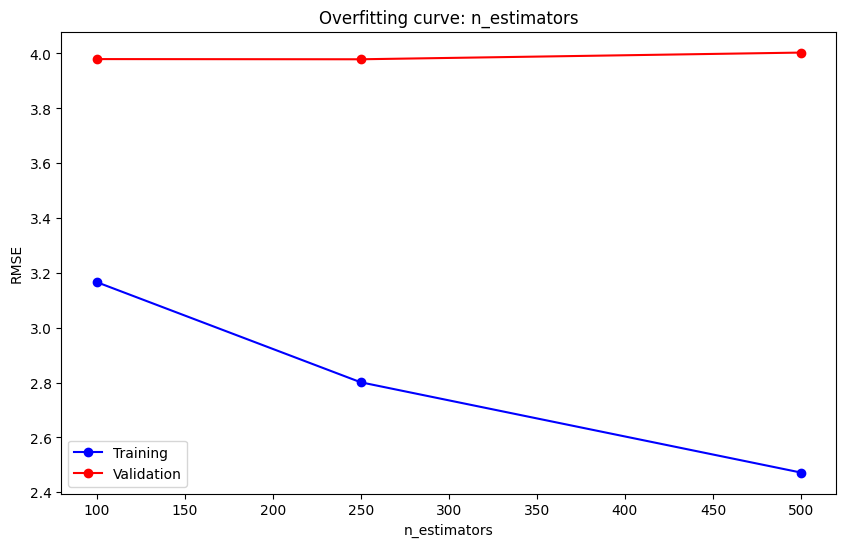

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 500 estimators has a low val loss but takes long so stick with 250.

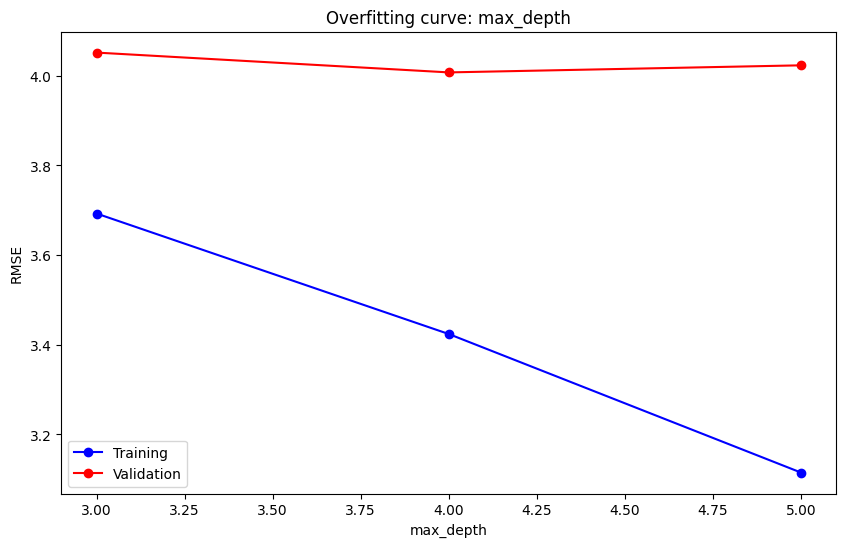

In [ ]:
best_params['n_estimators'] = 250

#Try max depth

test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

Looks like depth 5 is ideal

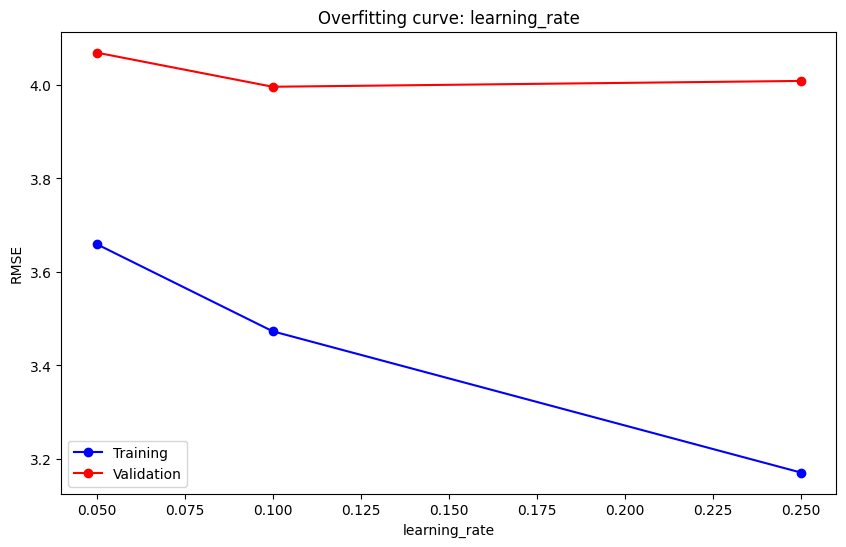

In [ ]:
best_params['max_depth'] = 5

test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)


Seems 0.25 is the best

In [ ]:
best_params['learning_rate'] = 0.25

#Our final model

xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1,
                               subsample=0.8, colsample_bytree=0.8)

xgb_model_final.fit(train_inputs, train_targets)

evaluate(xgb_model_final)

predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

3.2229128 4.0006857 [ 6.4981604  7.3416486  9.835163  ... 11.688329   9.2787075 10.041097 ] [14.727501  5.888444 48.040924 ...  7.680108 30.64048   8.739627]


,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.718120
1,2015-01-27 13:08:24.0000003,10.903567
2,2011-10-08 11:53:44.0000002,4.793131
3,2012-12-01 21:12:12.0000002,8.653376
4,2012-12-01 21:12:12.0000003,15.822300
...,...,...
9909,2015-05-10 12:37:51.0000002,8.648521
9910,2015-01-12 17:05:51.0000001,11.568141
9911,2015-04-19 20:44:15.0000001,54.186314
9912,2015-01-31 01:05:19.0000005,19.986612


## GPU



Figure out yourself.

https://jovian.ai/allenkong221/nyc-taxi-fare-rapids-dask-gpu/v/1?utm_source=embed#C10

In [ ]:
!pip install dask_cudf dask_cuda dask_ml

ERROR: Could not find a version that satisfies the requirement dask_cudf (from versions: none)
ERROR: No matching distribution found for dask_cudf


In [ ]:
import numba, socket
import cudf
import dask, dask_cudf
from dask_cuda import LocalCUDACluster
from dask.delayed import delayed
import dask.dataframe as dd
from dask.distributed import Client, wait, LocalCluster
from dask_ml.model_selection import train_test_split
import xgboost

cluster = LocalCluster(n_workers=1)
client = Client(cluster)
client.restart()

dask.config.set({'distributed.scheduler.work-stealing': False})
dask.config.get('distributed.scheduler.work-stealing')
dask.config.set({'distributed.scheduler.bandwidth': 1})
dask.config.get('distributed.scheduler.bandwidth')

df = dask_cudf.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv')

df = dask_cudf.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv')

# apply a list of filter conditions to throw out records with missing or outlier values
query_frags = [
    'fare_amount >= 2.5 and fare_amount < 500',
    'passenger_count > 0 and passenger_count < 6',
    'pickup_longitude > -75 and pickup_longitude < -73',
    'dropoff_longitude > -75 and dropoff_longitude < -73',
    'pickup_latitude > 40 and pickup_latitude < 42',
    'dropoff_latitude > 40 and dropoff_latitude < 42'
]
df = df.query(' and '.join(query_frags))

import math
from math import cos, sin, asin, sqrt, pi

def h_distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, h_distance):
    for i, (x_1, y_1, x_2, y_2) in enumerate(zip(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)):
        x_1 = pi/180 * x_1
        y_1 = pi/180 * y_1
        x_2 = pi/180 * x_2
        y_2 = pi/180 * y_2

        dlon = y_2 - y_1
        dlat = x_2 - x_1
        a = sin(dlat/2)**2 + cos(x_1) * cos(x_2) * sin(dlon/2)**2

        c = 2 * asin(sqrt(a))
        r = 6371 # Radius of earth in kilometers

        h_distance[i] = c * r

def jfk_distance(dropoff_latitude, dropoff_longitude, jfk_distance):
    for i, (x_1, y_1) in enumerate(zip(dropoff_latitude, dropoff_longitude)):
        x_1 = pi/180 * x_1
        y_1 = pi/180 * y_1
        x_jfk = pi/180 * 40.6413
        y_jfk = pi/180 * -73.7781

        dlon = y_jfk - y_1
        dlat = x_jfk - x_1
        a = sin(dlat/2)**2 + cos(x_1) * cos(x_jfk) * sin(dlon/2)**2

        c = 2 * asin(sqrt(a))
        r = 6371 # Radius of earth in kilometers

        jfk_distance[i] = c * r

def lga_distance(dropoff_latitude, dropoff_longitude, lga_distance):
    for i, (x_1, y_1) in enumerate(zip(dropoff_latitude, dropoff_longitude)):
        x_1 = pi/180 * x_1
        y_1 = pi/180 * y_1
        x_lga = pi/180 * 40.7769
        y_lga = pi/180 * -73.8740

        dlon = y_lga - y_1
        dlat = x_lga - x_1
        a = sin(dlat/2)**2 + cos(x_1) * cos(x_lga) * sin(dlon/2)**2

        c = 2 * asin(sqrt(a))
        r = 6371 # Radius of earth in kilometers

        lga_distance[i] = c * r

def ewr_distance(dropoff_latitude, dropoff_longitude, ewr_distance):
    for i, (x_1, y_1) in enumerate(zip(dropoff_latitude, dropoff_longitude)):
        x_1 = pi/180 * x_1
        y_1 = pi/180 * y_1
        x_ewr = pi/180 * 40.6895
        y_ewr = pi/180 * -74.1745

        dlon = y_ewr - y_1
        dlat = x_ewr - x_1
        a = sin(dlat/2)**2 + cos(x_1) * cos(x_ewr) * sin(dlon/2)**2

        c = 2 * asin(sqrt(a))
        r = 6371 # Radius of earth in kilometers

        ewr_distance[i] = c * r

def tsq_distance(dropoff_latitude, dropoff_longitude, tsq_distance):
    for i, (x_1, y_1) in enumerate(zip(dropoff_latitude, dropoff_longitude)):
        x_1 = pi/180 * x_1
        y_1 = pi/180 * y_1
        x_tsq = pi/180 * 40.7580
        y_tsq = pi/180 * -73.9855

        dlon = y_tsq - y_1
        dlat = x_tsq - x_1
        a = sin(dlat/2)**2 + cos(x_1) * cos(x_tsq) * sin(dlon/2)**2

        c = 2 * asin(sqrt(a))
        r = 6371 # Radius of earth in kilometers

        tsq_distance[i] = c * r

def met_distance(dropoff_latitude, dropoff_longitude, met_distance):
    for i, (x_1, y_1) in enumerate(zip(dropoff_latitude, dropoff_longitude)):
        x_1 = pi/180 * x_1
        y_1 = pi/180 * y_1
        x_met = pi/180 * 40.7794
        y_met = pi/180 * -73.9632

        dlon = y_met - y_1
        dlat = x_met - x_1
        a = sin(dlat/2)**2 + cos(x_1) * cos(x_met) * sin(dlon/2)**2

        c = 2 * asin(sqrt(a))
        r = 6371 # Radius of earth in kilometers

        met_distance[i] = c * r

def wtc_distance(dropoff_latitude, dropoff_longitude, wtc_distance):
    for i, (x_1, y_1) in enumerate(zip(dropoff_latitude, dropoff_longitude)):
        x_1 = pi/180 * x_1
        y_1 = pi/180 * y_1
        x_wtc = pi/180 * 40.7126
        y_wtc = pi/180 * -74.0099

        dlon = y_wtc - y_1
        dlat = x_wtc - x_1
        a = sin(dlat/2)**2 + cos(x_1) * cos(x_wtc) * sin(dlon/2)**2

        c = 2 * asin(sqrt(a))
        r = 6371 # Radius of earth in kilometers

        wtc_distance[i] = c * r

def add_features(df):
    df['hour'] = df['pickup_datetime'].dt.hour
    df['year'] = df['pickup_datetime'].dt.year
    df['month'] = df['pickup_datetime'].dt.month
    df['day'] = df['pickup_datetime'].dt.day
    df['weekday'] = df['pickup_datetime'].dt.weekday

    df = df.apply_rows(h_distance, incols=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'],
                       outcols=dict(h_distance=np.float32), kwargs=dict())

    df = df.apply_rows(jfk_distance, incols=['dropoff_latitude', 'dropoff_longitude'],
                       outcols=dict(jfk_distance=np.float32), kwargs=dict())

    df = df.apply_rows(lga_distance, incols=['dropoff_latitude', 'dropoff_longitude'],
                       outcols=dict(lga_distance=np.float32), kwargs=dict())

    df = df.apply_rows(ewr_distance, incols=['dropoff_latitude', 'dropoff_longitude'],
                       outcols=dict(ewr_distance=np.float32), kwargs=dict())

    df = df.apply_rows(tsq_distance, incols=['dropoff_latitude', 'dropoff_longitude'],
                       outcols=dict(tsq_distance=np.float32), kwargs=dict())

    df = df.apply_rows(met_distance, incols=['dropoff_latitude', 'dropoff_longitude'],
                       outcols=dict(met_distance=np.float32), kwargs=dict())

    df = df.apply_rows(wtc_distance, incols=['dropoff_latitude', 'dropoff_longitude'],
                       outcols=dict(wtc_distance=np.float32), kwargs=dict())

    df = df.drop(['pickup_datetime','key'], axis=1)

    return df

y = df['fare_amount']
X = df.drop(['fare_amount'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

dtrain = xgb.dask.DaskDMatrix(client, X_train, y_train)
dvalid = xgb.dask.DaskDMatrix(client, X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {
    'learning_rate': 0.05,
    'max_depth': 11,
    'objective': 'reg:squarederror',
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 1,
    'gamma': 1,
    'silent': True,
    'verbose_eval': True,
    'booster' : 'gbtree',
    'eval_metric': 'rmse',
    'tree_method':'gpu_hist',
    'n_gpus': 1
}

trained_model = xgb.dask.train(client, params, dtrain, num_boost_round=7000, evals=watchlist, early_stopping_rounds=100, verbose_eval=100)

# prepare test set
test = dask_cudf.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

test['key'] = test['key'].astype('datetime64[ns]')
test['pickup_datetime'] = test['pickup_datetime'].astype('datetime64[ns]')
test['pickup_longitude'] = test ['pickup_longitude'].astype('float32')
test['pickup_latitude'] = test ['pickup_latitude'].astype('float32')
test['dropoff_longitude'] = test ['dropoff_longitude'].astype('float32')
test['dropoff_latitude'] = test ['dropoff_latitude'].astype('float32')
test['passenger_count'] = test ['passenger_count'].astype('uint8')

# now add the features
tparts = [dask.delayed(add_features)(part) for part in test.to_delayed()]
test = dask_cudf.from_delayed(tparts)

# inspect the result
test.head().to_pandas()

dtest = xgb.dask.DaskDMatrix(client, test)
prediction = xgb.dask.predict(client, trained_model['booster'], dtest)
s = prediction.compute()

sub = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv')

submission = pd.DataFrame()
submission['key']  = sub['key']
submission['fare_amount'] = s
submission.to_csv('submission.csv', index = False)

ModuleNotFoundError: No module named 'dask_cudf'